In [1]:
import os
from random import sample
import sys
print(os.path.abspath(os.curdir))  
os.chdir("..")  # go to parent folder
os.chdir("..")  # go to parent folder

print(os.path.abspath(os.curdir))  
sys.path.insert(0, os.path.abspath(os.curdir))
from NMRKineticSimu import Xe129, Methanol, TestSample10MHzT, Mainz, TestStation
from NMRKineticSimu import *
from DataAnalysis import *

sqdsensor = SQUID(name='Virtual SQUID',
                 Mf = 1.,
                 Rf = 1.  # in Ohm
         )

\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\Supplementary\20220818_AxionWindSimulation
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code


C:\Users\zhenf\AppData\Local\Temp/ipykernel_1668/1584728678.py @13 ALPnuorder : int(6) 
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @817 self.ALPwind.BALP * abs(self.sample.gyroratio) : float(9.999999999999999e-06) 
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @820 np.mean(np.sqrt(self.BALPsq_arr)) * abs(self.sample.gyroratio) : float64(4.179350574099654e-06) [shape=()]
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @821 np.sqrt(np.mean(self.BALPsq_arr)) * abs(self.sample.gyroratio) : float64(5.284662137978128e-06) [shape=()]


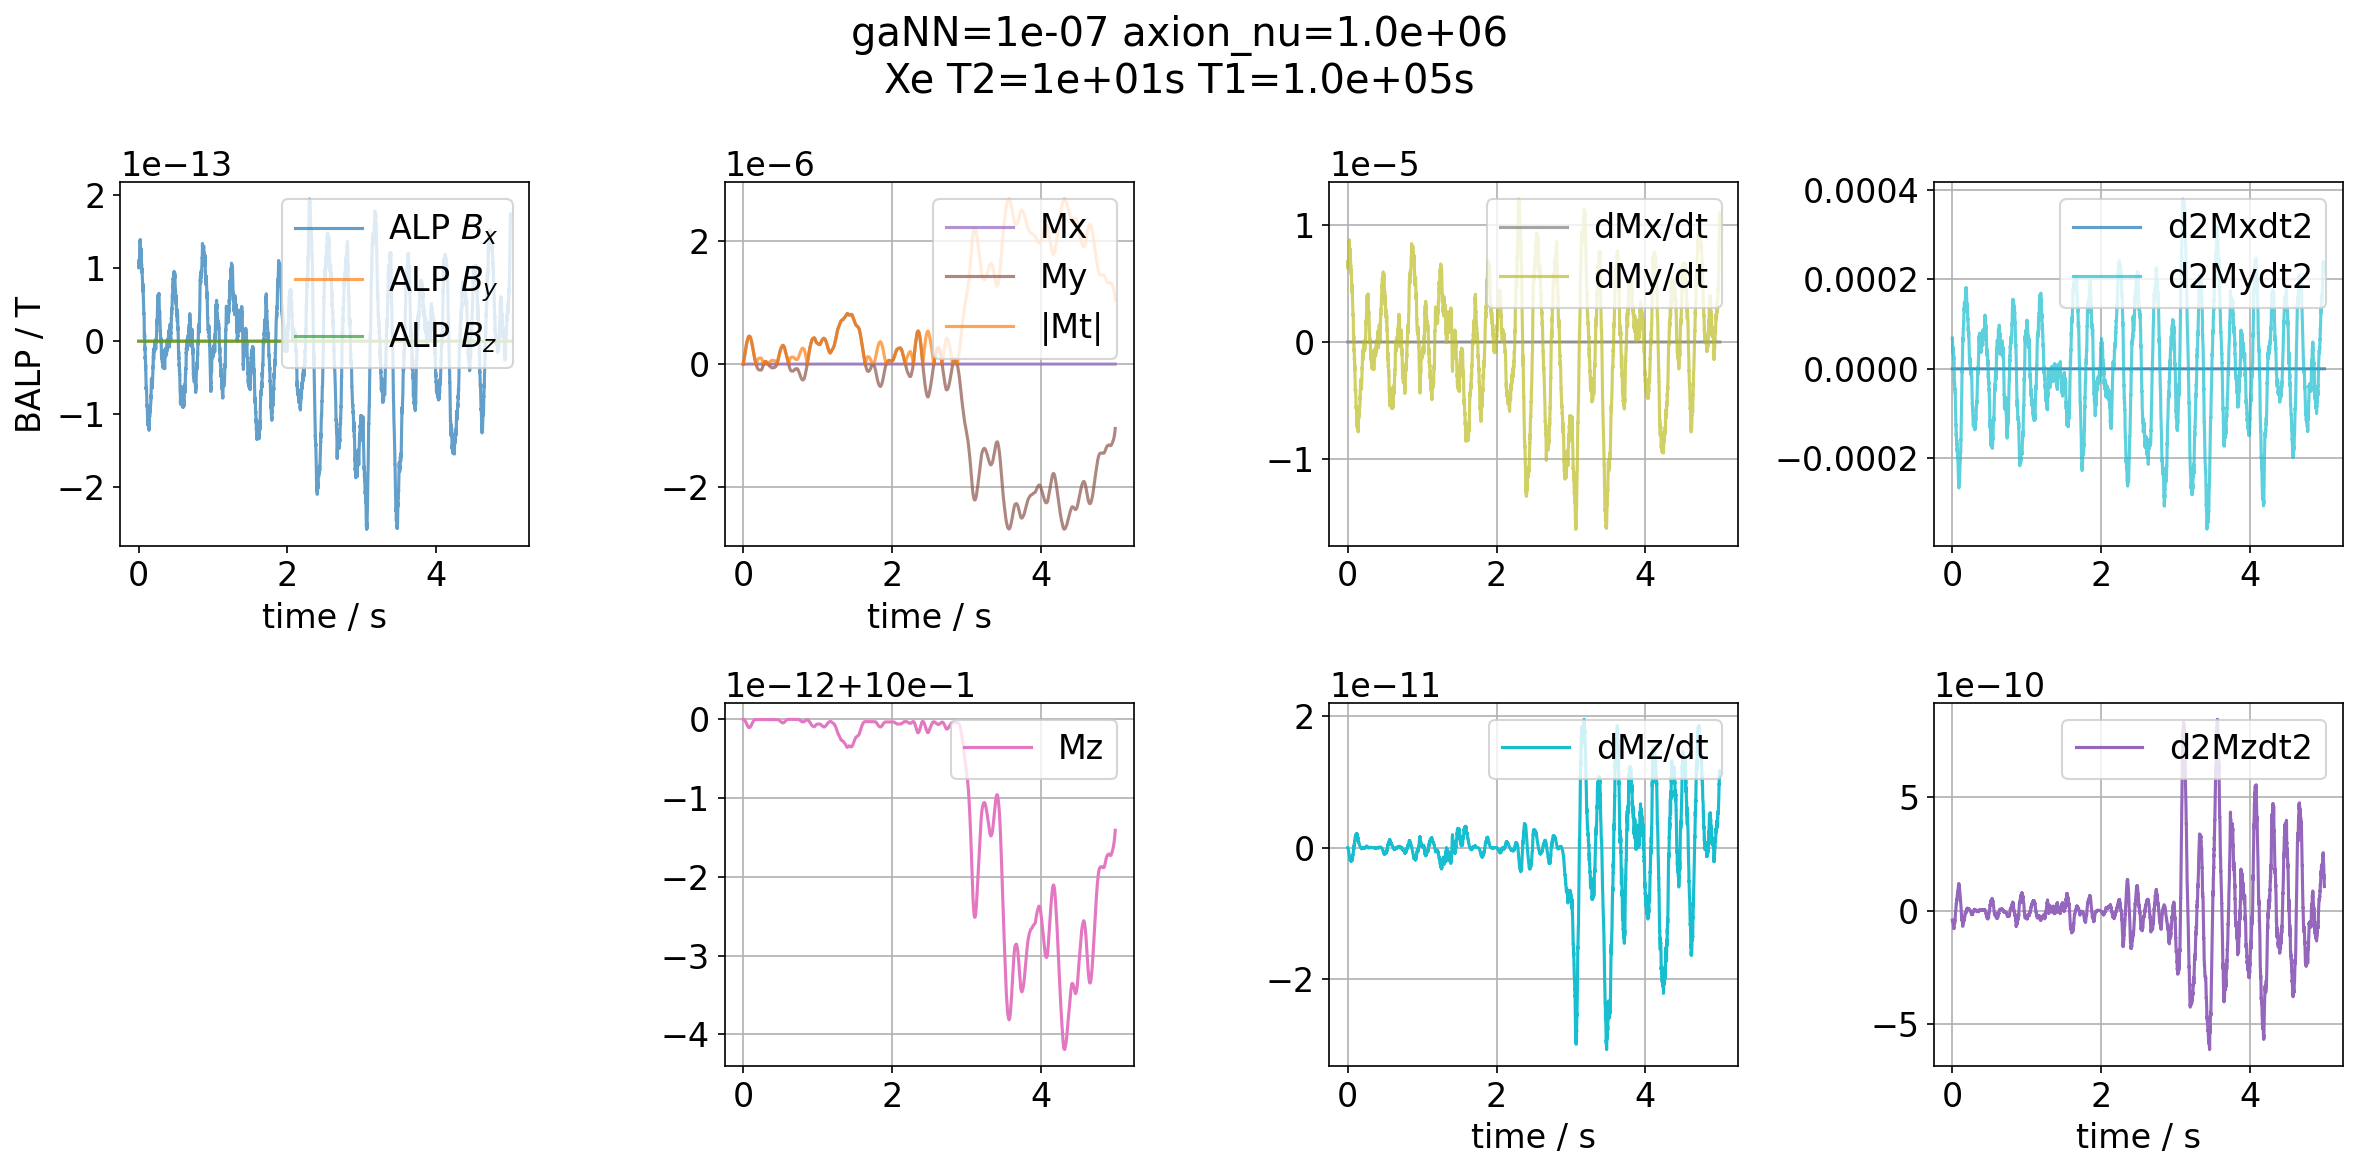

***************************************************************************
T2* = 1.000000e+01
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @1394 self.avgMxsq : float64(7.622587530487218e-20) [shape=()]
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @1395 self.avgMysq : float64(1.704896418150446e-12) [shape=()]
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @1396 self.avgMzsq : float64(0.9999999999979085) [shape=()]
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @1397 np.sqrt(self.avgMxsq+self.avgMysq) : float64(1.3057168507667814e-06) [shape=()]
**************************************************************************


In [36]:
TestSample = TestSample10MHzT
listofGammaandSAmp = []
listofT2andavgMtsq = []
listofspectrum = []
gaNNorder_arr = np.arange(-2.,-11.,-0.5)
ALPnuorder_arr = np.arange(3.,7.,1)
# avg_absMxy_list = []
avg_sqrtMxysq_list = []
avg_absBALP_list = []
avg_sqrtBALPsq_list = []
T2star_arr = 10**(np.array([1]))  ## -4., -3.5, -3., -2.5, -2., -1.5, -1., -0.5, 0., 0.5, 1., 1.5[1/(np.pi * 2)]
for ALPnuorder in [6]:
	check(ALPnuorder)
	for T2star in T2star_arr:
		# check(T2star)
		for gaNNorder in [-7]:
			# check(gaNNorder)
			axionwind = AxionWind(
				name='ALP',
				nu=10 ** ALPnuorder,  # compton frequency in [Hz]
				Gamma=1. * 10. ** (-6),  # spectrum linewidth. 
				gaNN=10**gaNNorder,  # in Gev^-1
				direction_solar=np.array([1, 90*np.pi/180., -90. * np.pi / 180]),
				# Sun is moveing towards phi=90 deg, so axion direction phi = -90 deg 
				verbose=False
				)
			axionwind.BALP = 100 * axionwind.gaNN / abs(TestSample.gyroratio)
			magnetization = MagVec(
					name=TestSample.name,
					sample=TestSample,  # class Sample
					gyroratio=TestSample.gyroratio,  # [Hz/T]
					init_time=0.,  # [s]
					station=TestStation,
					init_magamp=1.,
					init_magtheta=0.,  # [rad]
					init_magphi=0.,  # [rad]
					B0z=(10**ALPnuorder+6) / TestSample.gyroratio * 2 * np.pi,  # [T]
					simurate=(6696.42871094),  # max(10000, a
					ALPwind=axionwind,
					T2=1.0*T2star,  # 1.0/(np.pi*samplelinewidth)
					T1=100000.0,
					verbose=False,
					)
			# tic = time.perf_counter()
			magnetization.GenerateParam(
					numofcohT=5,  #max(10 * T2star, 1)
					method='ThermalLight',  #'ThermalLight' 'RandomJump' 'InfCoherence'
					showplt=False,  # whether to plot B_ALP
					plotrate=0.1,
					verbose=False
					)
			# toc = time.perf_counter()
			# print(f'GenerateParam time consumption = {toc-tic:.3f} s')
			# simurate 1000, numofcohT=100/axionwind.cohT, not usejit. time = 2.3 s
			# simurate 1000, numofcohT=100/axionwind.cohT, usejit @jit. time = 1.8 s
			# simurate 1000, numofcohT=100/axionwind.cohT, usejit @jit(types blabla). time = 0.1 s
			# simurate 1000, numofcohT=1000/axionwind.cohT, usejit @jit(types blabla). time = 1.1 s
			# simurate 1000, numofcohT=100000/axionwind.cohT, usejit @jit(types blabla). time = 107.1 s

			tic = time.perf_counter()
			magnetization.GenerateTrajectory(verbose=False)
			toc = time.perf_counter()
			# print(f'GenerateTrajectory time consumption = {toc-tic:.3f} s')
			# simurate 1000, numofcohT=100/axionwind.cohT, not usejit. time = 4.2 s
			# simurate 1000, numofcohT=100/axionwind.cohT, usejit @jit. time = 1.6 s
			# simurate 1000, numofcohT=100/axionwind.cohT, usejit @jit(types blabla). time = 0.208 s
			# simurate 1000, numofcohT=1000/axionwind.cohT, usejit @jit(types blabla). time = 2.069 s

			magnetization.MonitorTrajectory(plotrate=10**3,verbose=True)
			# magnetization.VisualizeTrajectory3D(
			#         plotrate=10**3,  # [Hz]
			#         # rotframe=True,
			#         verbose=False,
			#     )
			# magnetization.SaveTrajectory(
			# 		h5fpathandname=f'K:/CASPEr data/20220522_NMRKineticSimu_data_test2/sample_IDEN/'+\
			# 						f'simudata_test2_ALPwind.nu_1e{ALPnuorder:.1f}_gaNN_1e{gaNNorder:.1f}_samplelinewidth_{samplelinewidth:g}_'+\
			# 							f'T1_{magnetization.T1:g}_T2_{magnetization.T2:.3g}',
			# 		saveintv=1,  # int
			# 		verbose=False
			# )
			print(f'***************************************************************************')
			print(f'T2* = {magnetization.T2:e}')
			magnetization.StatTrajectory(verbose=True)
			print(f'**************************************************************************')
			# avg_absMxy_list.append(np.sqrt(magnetization.avgMxsq+magnetization.avgMysq))
			avg_sqrtMxysq_list.append(np.sqrt(magnetization.avgMxsq+magnetization.avgMysq))
			avg_sqrtBALPsq_list.append(np.mean(np.sqrt(magnetization.BALPsq_arr)))
			avg_absBALP_list.append(np.sqrt(np.mean(magnetization.BALPsq_arr)))

			# processdata = False
			# if processdata:

In [37]:
check(avg_sqrtMxysq_list)
check(avg_sqrtBALPsq_list)
check(avg_sqrtMxysq_list[0]/avg_sqrtBALPsq_list[0]/TestSample10MHzT.gyroratio)
print(avg_sqrtMxysq_list[0]/avg_sqrtBALPsq_list[0]/TestSample10MHzT.gyroratio)

C:\Users\zhenf\AppData\Local\Temp/ipykernel_1668/2253998996.py @1 avg_sqrtMxysq_list : list([1.3057168507667814e-06]) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_1668/2253998996.py @2 avg_sqrtBALPsq_list : list([6.651643027819106e-14]) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_1668/2253998996.py @3 avg_sqrtMxysq_list[0]/avg_sqrtBALPsq_list[0]/TestSample10MHzT.gyroratio : float64(0.3124209916388908) [shape=()]
0.3124209916388908


In [38]:
#  T2* = 1.000000e+01
# detuning -4 Hz
check(0.05532332337721215)
# detuning - 2 Hz
check((0.22368522544410424+0.11774272095097821)/2)
# detuning 0 Hz
check(0.26641018014229145)
# detuning 2 Hz
check(0.3887758616912669)
# detuning + 4 Hz
check(1.2386787144517868)
# +6 Hz
check(0.3124209916388908)

C:\Users\zhenf\AppData\Local\Temp/ipykernel_1668/2443060196.py @3 0.05532332337721215 : float(0.05532332337721215) 
C:\Users\zhenf\AppData\Local\Temp/ipykernel_1668/2443060196.py @5 (0.22368522544410424+0.11774272095097821)/2 : float(0.17071397319754122) 
C:\Users\zhenf\AppData\Local\Temp/ipykernel_1668/2443060196.py @7 0.26641018014229145 : float(0.26641018014229145) 
C:\Users\zhenf\AppData\Local\Temp/ipykernel_1668/2443060196.py @9 0.3887758616912669 : float(0.3887758616912669) 
C:\Users\zhenf\AppData\Local\Temp/ipykernel_1668/2443060196.py @11 1.2386787144517868 : float(1.2386787144517868) 
C:\Users\zhenf\AppData\Local\Temp/ipykernel_1668/2443060196.py @13 0.3124209916388908 : float(0.3124209916388908) 


In [22]:
#  Gamma = 2 Hz
# detuning 1.34 Hz
check(4.2526465729692575e-07/6.209036214870874e-14/TestSample10MHzT.gyroratio * 10)
# detuning 1.34 - 2 Hz
check(3.6243449654942395e-07/8.133236941404179e-14/TestSample10MHzT.gyroratio * 10)
# detuning 1.34 - 4 Hz
check(2.3383328775254048e-07/7.746903585784707e-14/TestSample10MHzT.gyroratio * 10)
# detuning 1.34 - 6 Hz
check(1.46631818121354e-07/7.968559749700176e-14/TestSample10MHzT.gyroratio * 10)
# detuning 1.34 + 2 Hz
check(5.927136612235966e-07/7.59716014816923e-14/TestSample10MHzT.gyroratio * 10)
# detuning 1.34 + 4 Hz
check(3.9641632132758565e-07/6.533518327809184e-14/TestSample10MHzT.gyroratio * 10)
# # detuning 1.34 + 6 Hz
# check(1.46631818121354e-07/7.968559749700176e-14/TestSample10MHzT.gyroratio * 10)

C:\Users\zhenf\AppData\Local\Temp/ipykernel_1668/2512685360.py @2 4.2526465729692575e-07/6.209036214870874e-14/TestSample10MHzT.gyroratio * 10 : float(1.0900721140743768) 
C:\Users\zhenf\AppData\Local\Temp/ipykernel_1668/2512685360.py @4 3.6243449654942395e-07/8.133236941404179e-14/TestSample10MHzT.gyroratio * 10 : float(0.7092285899014332) 
C:\Users\zhenf\AppData\Local\Temp/ipykernel_1668/2512685360.py @6 2.3383328775254048e-07/7.746903585784707e-14/TestSample10MHzT.gyroratio * 10 : float(0.4803948208873529) 
C:\Users\zhenf\AppData\Local\Temp/ipykernel_1668/2512685360.py @8 1.46631818121354e-07/7.968559749700176e-14/TestSample10MHzT.gyroratio * 10 : float(0.29286570473972195) 
C:\Users\zhenf\AppData\Local\Temp/ipykernel_1668/2512685360.py @10 5.927136612235966e-07/7.59716014816923e-14/TestSample10MHzT.gyroratio * 10 : float(1.2416917266718799) 
C:\Users\zhenf\AppData\Local\Temp/ipykernel_1668/2512685360.py @12 3.9641632132758565e-07/6.533518327809184e-14/TestSample10MHzT.gyroratio * 1

In [5]:
# detuning 1.34 Hz
check(avg_sqrtMxysq_list)
# check(avg_absBALP_list)
check(avg_sqrtBALPsq_list)

C:\Users\zhenf\AppData\Local\Temp/ipykernel_1668/642122784.py @1 avg_sqrtMxysq_list : list([4.2526465729692575e-07]) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_1668/642122784.py @3 avg_sqrtBALPsq_list : list([6.209036214870874e-14]) [len=1]


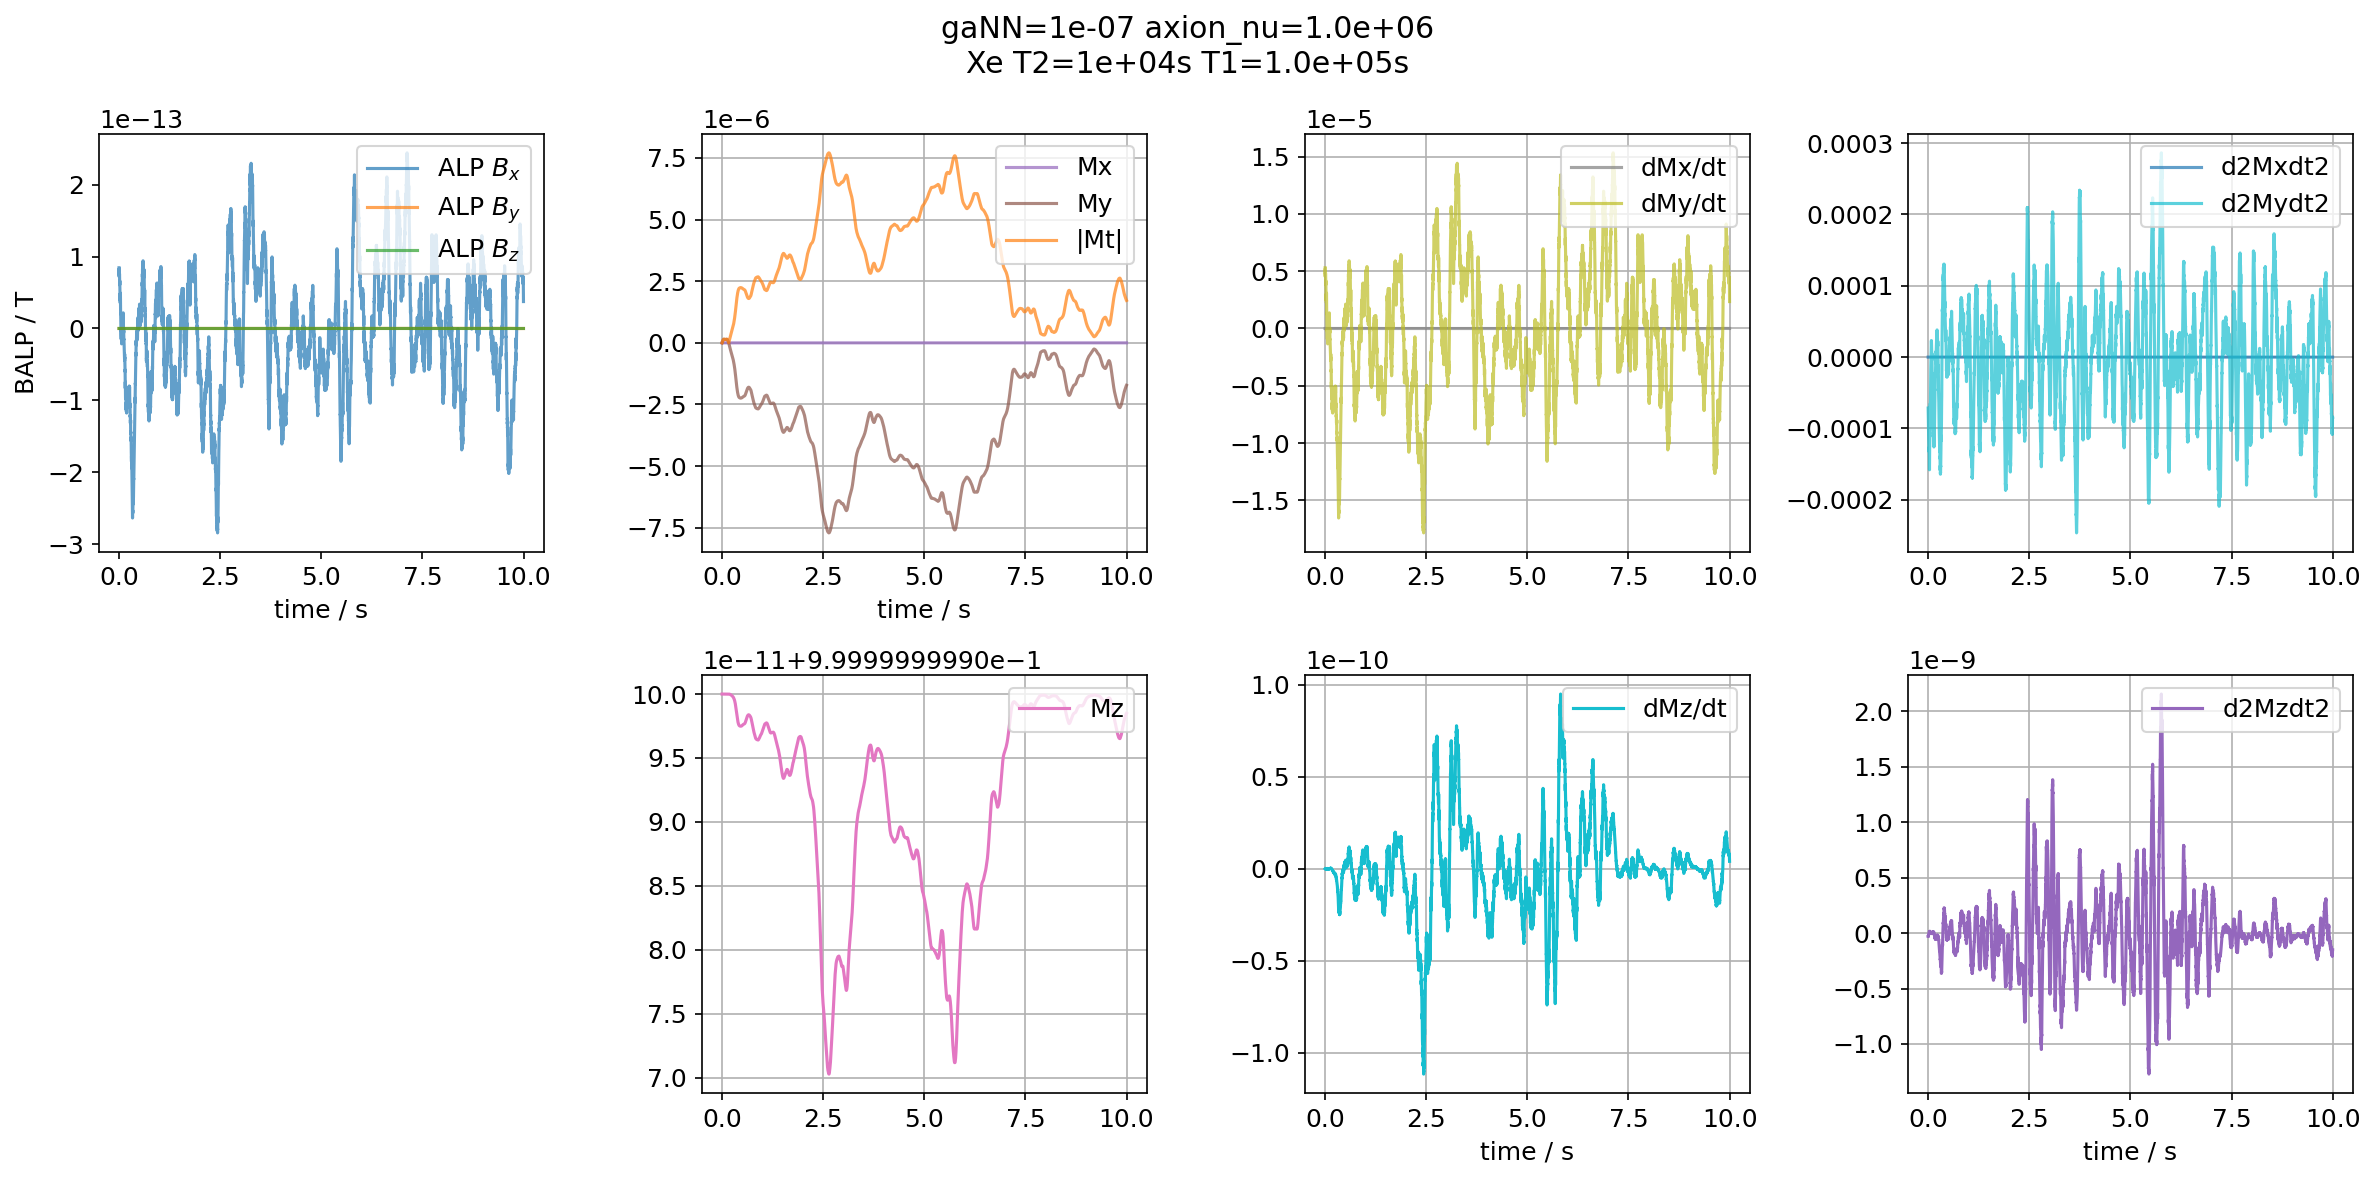

In [57]:
magnetization.MonitorTrajectory(plotrate=10**3,verbose=True)
# check(np.mean(magnetization.nu_a_arr))
# check(abs(magnetization.sample.gyroratio*magnetization.B0z/(2 * np.pi)))

In [28]:
check(avg_sqrtMxysq_list)
check(avg_absBALP_list)
check(avg_sqrtBALPsq_list)

C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/3866684642.py @1 avg_sqrtMxysq_list : list([2.2333038491821554e-06]) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/3866684642.py @2 avg_absBALP_list : list([8.061818909001742e-14]) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/3866684642.py @3 avg_sqrtBALPsq_list : list([9.704109486569754e-14]) [len=1]


C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/461727017.py @15 magnetization.timestamp.shape : tuple((33482,)) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/461727017.py @16 magnetization.trjry[0:-1:saveintv, 0].shape : tuple((33482,)) [len=1]


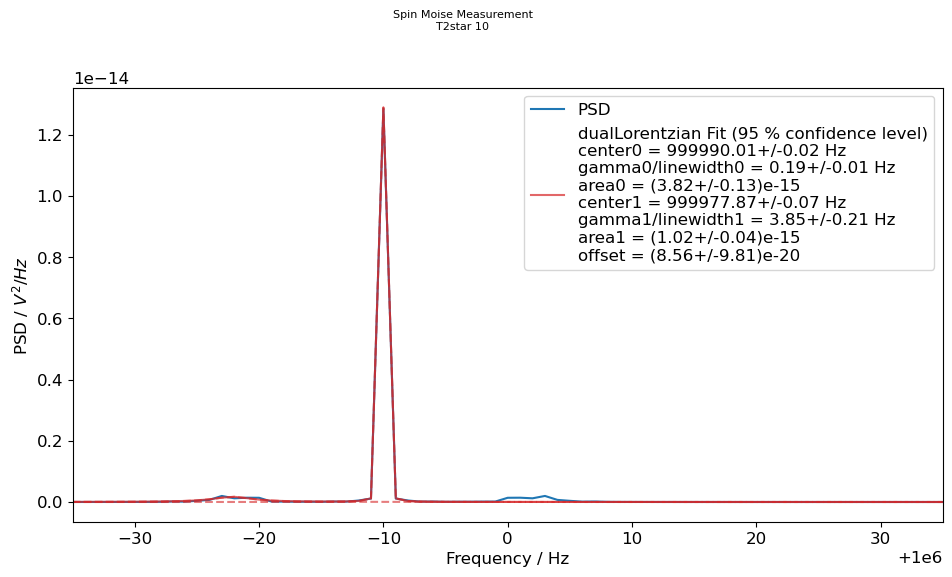

linewidth = 0.031831 Hz, np.amax(spectrum) = 1.29e-14
T2star = 10 , avg Mt sq = 5.93e-14


In [101]:
liastream = LIASignal(
	name='LIA data',
	device='LIA',
	device_id='dev4434',
	file=f'T2star {T2star:g}',
	verbose=True
	)
liastream.attenuation = 0
liastream.filterstatus = 'off'
liastream.LIAfilter_TC=0.0
liastream.LIAfilter_order = 0
liastream.dmodfreq = magnetization.B0z * TestSample.gyroratio / (2 * np.pi)
saveintv = 1
liastream.samprate = magnetization.simurate / saveintv
check(magnetization.timestamp.shape)
check(magnetization.trjry[0:-1:saveintv, 0].shape)

liastream.dataX = 0.5 * magnetization.trjry[int(0*magnetization.simurate):-1:saveintv, 0] #* \
	#np.cos(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])
liastream.dataY = 0.5 * magnetization.trjry[int(0*magnetization.simurate):-1:saveintv, 1] #* \
	#np.sin(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])

# liastream.dataX = 0.5 * 1 * \
# 	np.cos(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])
# liastream.dataY = 0.5 * 1 * \
# 	np.sin(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])

liastream.GetSpinNoisePSD(
	chunksize=1,  # magnetization.T2
	analysisrange = [0, -1],  # [0, int(9*samplelinewidth*liastream.samprate)]
	interestingfreq_list=[],
	# ploycorrparas=ployparas,
	ploycorrparas=[],
	showstd=False,
	# stddev_range=[1.349150e6,1.349750e6],
	verbose=False)
liastream.FitPSD(
		fitfunction = 'dualLorentzian',  # 'Lorentzian' 'dualLorentzian' 'tribLorentzian' 'Gaussian 'dualGaussian' 'auto' 'Polyeven' 
		inputfitparas = ['auto','auto','auto','auto'],
		smooth=False,
		smoothlevel=1,
		fitrange=['auto','auto'],
		alpha=0.05, 
		
		getresidual=False, 
		getchisq=False, 
		verbose=False    
	)
specxaxis, spectrum, specxunit, specyunit = liastream.GetSpectrum(
	showtimedomain=False,
	showacqdata=True,
	showfreqdomain=True,
	showfit=True,
	showresidual=False,
	showlegend=True,  # !!!!!show or not to show legend
	spectype='PSD',  # in 'PSD', 'ASD', 'FLuxPSD', 'FluxASD'
	ampunit='V',
	Mf=sqdsensor.Mf,
	Rf=sqdsensor.Rf,
	specxunit='Hz',  # 'Hz' 'kHz' 'MHz' 'GHz' 'ppm' 'ppb'
	specxlim = [axionwind.nu - 35, axionwind.nu + 35],
	# specylim=[0, 4e-23],
	# specxunit2 = 'ppm', 
	# referfreq=liastream.dmodfreq,
	# specx2format = '{:.0f}',
	
	specyscale='linear',  # 'log', 'linear'
	showstd=False,
	
	figsize=(10,6),

	top=0.85,
	bottom=0.03,
	left=0.11,
	right=0.98,
	hspace=0.73,
	wspace=0.2,

	showplt_opt=True,
	return_opt=True,
	verbose=False
	)
print(f'linewidth = {1.0 / (np.pi * T2star):g} Hz, np.amax(spectrum) = {np.amax(spectrum):.2e}')
listofGammaandSAmp.append([T2star, np.amax(spectrum)])
listofT2andavgMtsq.append([magnetization.T2, magnetization.avgMxsq + magnetization.avgMysq])  # , np.sum(spectrum), np.amax(spectrum)
print(f'T2star = {T2star:g} , avg Mt sq = {magnetization.avgMxsq + magnetization.avgMysq:.2e}')

# listofspectrum.append(spectrum)
# K:\CASPEr data\20220522_NMRKineticSimu_data_test2
# f'\\\\Desktop-3ge6tor/d/Mainz/CASPEr/20220522_NMRKineticSimu_data/20220522_test0/sample_IDEN/'

C:\Users\zhenf\AppData\Local\Temp/ipykernel_17152/1154651983.py @15 magnetization.timestamp.shape : tuple((26785,)) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_17152/1154651983.py @16 magnetization.trjry[0:-1:saveintv, 0].shape : tuple((26785,)) [len=1]


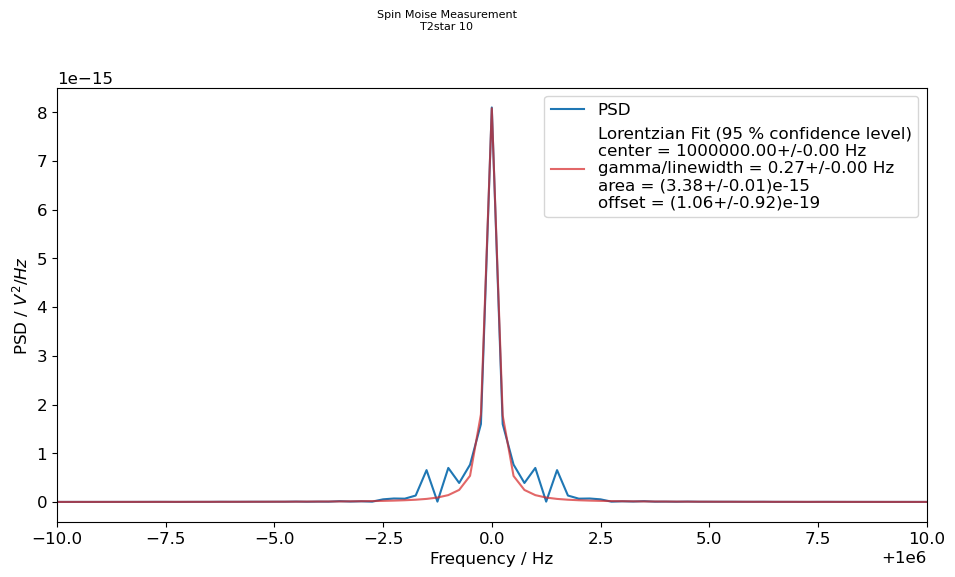

linewidth = 0.031831 Hz, np.amax(spectrum) = 8.10e-15
T2star = 10 , avg Mt sq = 1.74e-14


In [ ]:
liastream = LIASignal(
	name='LIA data',
	device='LIA',
	device_id='dev4434',
	file=f'T2star {T2star:g}',
	verbose=True
	)
liastream.attenuation = 0
liastream.filterstatus = 'off'
liastream.LIAfilter_TC=0.0
liastream.LIAfilter_order = 0
liastream.dmodfreq = magnetization.B0z * Xe129.gyroratio / (2 * np.pi)
saveintv = 1
liastream.samprate = magnetization.simurate / saveintv
check(magnetization.timestamp.shape)
check(magnetization.trjry[0:-1:saveintv, 0].shape)

liastream.dataX = 0.5 * magnetization.trjry[int(0*magnetization.simurate):-1:saveintv, 0] #* \
	#np.cos(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])
liastream.dataY = 0.5 * magnetization.trjry[int(0*magnetization.simurate):-1:saveintv, 1] #* \
	#np.sin(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])

# liastream.dataX = 0.5 * 1 * \
# 	np.cos(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])
# liastream.dataY = 0.5 * 1 * \
# 	np.sin(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])

liastream.GetSpinNoisePSD(
	chunksize=5,  # magnetization.T2
	analysisrange = [0, -1],  # [0, int(9*samplelinewidth*liastream.samprate)]
	interestingfreq_list=[],
	# ploycorrparas=ployparas,
	ploycorrparas=[],
	showstd=False,
	# stddev_range=[1.349150e6,1.349750e6],
	verbose=False)
liastream.FitPSD(
		fitfunction = 'Lorentzian',  # 'Lorentzian' 'dualLorentzian' 'tribLorentzian' 'Gaussian 'dualGaussian' 'auto' 'Polyeven' 
		inputfitparas = ['auto','auto','auto','auto'],
		smooth=False,
		smoothlevel=1,
		fitrange=['auto','auto'],
		alpha=0.05, 
		
		getresidual=False, 
		getchisq=False, 
		verbose=False    
	)
specxaxis, spectrum, specxunit, specyunit = liastream.GetSpectrum(
	showtimedomain=False,
	showacqdata=True,
	showfreqdomain=True,
	showfit=True,
	showresidual=False,
	showlegend=True,  # !!!!!show or not to show legend
	spectype='PSD',  # in 'PSD', 'ASD', 'FLuxPSD', 'FluxASD'
	ampunit='V',
	Mf=sqdsensor.Mf,
	Rf=sqdsensor.Rf,
	specxunit='Hz',  # 'Hz' 'kHz' 'MHz' 'GHz' 'ppm' 'ppb'
	specxlim = [axionwind.nu - 10, axionwind.nu + 10],
	# specylim=[0, 4e-23],
	# specxunit2 = 'ppm', 
	# referfreq=liastream.dmodfreq,
	# specx2format = '{:.0f}',
	
	specyscale='linear',  # 'log', 'linear'
	showstd=False,
	
	figsize=(10,6),

	top=0.85,
	bottom=0.03,
	left=0.11,
	right=0.98,
	hspace=0.73,
	wspace=0.2,

	showplt_opt=True,
	return_opt=True,
	verbose=False
	)
print(f'linewidth = {1.0 / (np.pi * T2star):g} Hz, np.amax(spectrum) = {np.amax(spectrum):.2e}')
listofGammaandSAmp.append([T2star, np.amax(spectrum)])
listofT2andavgMtsq.append([magnetization.T2, magnetization.avgMxsq + magnetization.avgMysq])  # , np.sum(spectrum), np.amax(spectrum)
print(f'T2star = {T2star:g} , avg Mt sq = {magnetization.avgMxsq + magnetization.avgMysq:.2e}')

# listofspectrum.append(spectrum)
# K:\CASPEr data\20220522_NMRKineticSimu_data_test2
# f'\\\\Desktop-3ge6tor/d/Mainz/CASPEr/20220522_NMRKineticSimu_data/20220522_test0/sample_IDEN/'

In [81]:
check(T2star_arr)
# check(avg_absMxy_list)
check(avg_sqrtMxysq_list)
# check(avg_absBALP_list)
check(avg_sqrtBALPsq_list)


C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/2006777022.py @1 T2star_arr : ndarray([  5.62341325  17.7827941   56.23413252 177.827941  ]) [shape=(4,)]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/2006777022.py @3 avg_sqrtMxysq_list : list([1.8936683372404932e-06, 3.446406711243213e-06, 2.9824055357928308e-06, 2.493152043067911e-06]) [len=4]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/2006777022.py @5 avg_sqrtBALPsq_list : list([8.012830385160042e-14, 1.0060984404189555e-13, 8.951541498537557e-14, 9.335857934389245e-14]) [len=4]


In [36]:
 # detuning + 1 Hz
check(T2star)
check(avg_sqrtMxysq_list)
check(avg_absBALP_list)
check(avg_sqrtBALPsq_list)

C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1360220588.py @1 T2star : float64(316.22776601683796) [shape=()]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1360220588.py @2 avg_sqrtMxysq_list : list([1.0291657069639695e-05]) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1360220588.py @3 avg_absBALP_list : list([7.345879605206319e-14]) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1360220588.py @4 avg_sqrtBALPsq_list : list([9.271410990648845e-14]) [len=1]


In [40]:
check(T2star) # no detuning
check(avg_sqrtMxysq_list)
check(avg_absBALP_list)
check(avg_sqrtBALPsq_list)

C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1360220588.py @1 T2star : float64(316.22776601683796) [shape=()]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1360220588.py @2 avg_sqrtMxysq_list : list([2.5588884454254495e-06]) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1360220588.py @3 avg_absBALP_list : list([7.95145735888222e-14]) [len=1]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1360220588.py @4 avg_sqrtBALPsq_list : list([1.0069474377420715e-13]) [len=1]


In [54]:
 # detuning + 1 Hz
check(T2star_arr)
check(avg_sqrtMxysq_list)
check(avg_absBALP_list)
check(avg_sqrtBALPsq_list)

C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1156032802.py @2 T2star_arr : ndarray([ 1000.          3162.27766017 10000.         10000.        ]) [shape=(4,)]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1156032802.py @3 avg_sqrtMxysq_list : list([9.103859068716038e-06, 3.489572228807298e-06, 4.389712567315872e-06, 4.036901298601079e-06]) [len=4]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1156032802.py @4 avg_absBALP_list : list([7.211204570272294e-14, 7.987491660576869e-14, 7.01579361067662e-14, 6.975328896647811e-14]) [len=4]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/1156032802.py @5 avg_sqrtBALPsq_list : list([8.828572572597242e-14, 1.0037410089447239e-13, 8.901933921516225e-14, 8.764071564599288e-14]) [len=4]


C:\Users\zhenf\AppData\Local\Temp/ipykernel_8472/2808942185.py @32 magnetization.ALPwind.BALP : float(1.591549430918953e-13) 


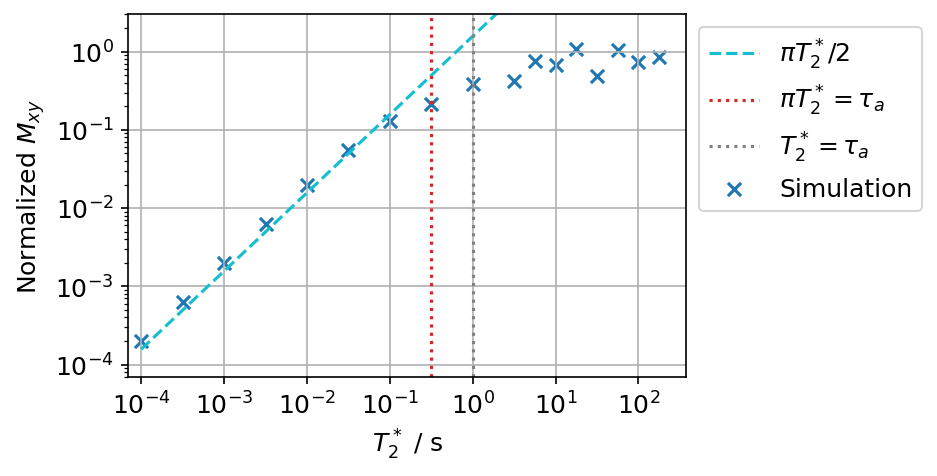

In [93]:
# data from 2022-08-25
T2star_arr = np.array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,\
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,\
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01, 1.000000e+02, 199.52623149688787, 316.22776601683796,\
       1000., 3162.27766017, 10000.,5.62341325 , 17.7827941,   56.23413252, 177.827941 ])

avg_sqrtMxysq_arr = np.array([6.00729525403692e-10, 1.892680563138194e-09, 6.320670227486919e-09, \
1.7849948295486614e-08, 5.722704219768959e-08, 1.831828483075051e-07,\
 4.02276477825698e-07, 6.488768660724763e-07, 1.1414089977788986e-06, 1.2433839539645424e-06, \
 2.2376262525500237e-06, 1.4880993433176427e-06, 2.2333038491821554e-06, 4.196305375588696e-06, 1.0291657069639695e-05,\
 9.103859068716038e-06, 3.489572228807298e-06, 4.389712567315872e-06,\
 1.8936683372404932e-06, 3.446406711243213e-06, 2.9824055357928308e-06, 2.493152043067911e-06])

# avg_absBALP_arr = np.array([9.563204636468877e-14, 9.528052775590814e-14, 1.0070631992363127e-13, 
# 9.019590747340721e-14, 9.35195829409311e-14, 1.0462683527124416e-13, 
# 9.894666698325927e-14, 9.779880509450935e-14, 9.514599957803521e-14, 9.376164395791295e-14, 
# 1.0510331838693979e-13, 9.614715461955493e-14])

avg_sqrtBALPsq_arr = np.array([9.563204636468877e-14, 9.528052775590814e-14, 1.0070631992363127e-13, \
9.019590747340721e-14, 9.35195829409311e-14, 1.0462683527124416e-13, \
9.894666698325927e-14, 9.779880509450935e-14, 9.514599957803521e-14, 9.376164395791295e-14, \
1.0510331838693979e-13, 9.614715461955493e-14, 9.704109486569754e-14, 9.271410990648845e-14, 9.349755671661435e-14,\
8.828572572597242e-14, 1.0037410089447239e-13, 8.901933921516225e-14,\
8.012830385160042e-14, 1.0060984404189555e-13, 8.951541498537557e-14, 9.335857934389245e-14])
# avg_sqrtMxysq_arr = np.array(avg_sqrtMxysq_list)
# avg_absBALP_arr = np.array(avg_absBALP_list)
# avg_sqrtBALPsq_arr = np.array(avg_sqrtBALPsq_list)

avg_sqrtMxysq_arr = avg_sqrtMxysq_arr[np.argsort(T2star_arr)]
avg_sqrtBALPsq_arr = avg_sqrtBALPsq_arr[np.argsort(T2star_arr)]
T2star_arr = np.sort(T2star_arr)
check(magnetization.ALPwind.BALP)

taua = 1.0
plt.rc('font', size=12)
fig = plt.figure(figsize=(6*0.8, 4*0.8), dpi=150)  #
gs = gridspec.GridSpec(nrows=1, ncols=1)  #
# fig.subplots_adjust(left=left_spc, top=top_spc, right=right_spc,
#                     bottom=bottom_spc, wspace=xgrid_spc, hspace=ygrid_spc)
ax = fig.add_subplot(gs[0,0])

# ax.plot(T2star_arr, T2star_arr * 1 / (T2star_arr + 1), label='$\dfrac{T_2^*\\tau_a}{T_2^* + \\tau_a}$', color='tab:brown', alpha=1, linestyle='--')
ax.plot(T2star_arr, np.pi * T2star_arr / 2, label='$\\pi T_2^*/2$', color='tab:cyan', alpha=1, linestyle='--')
# ax.plot(T2star_arr, (1 - np.exp(- (np.pi*T2star_arr / taua)**1)) * 0.5 * taua, label='$(1-\\exp{(-\\pi T_2^*/\\tau_a)})\\tau_a/2$', 
# color='tab:green', alpha=1, linestyle='--')
# ax.plot(T2star_arr, (1 - np.exp(- np.pi*T2star_arr / taua)) * taua, label='$(1-\\exp{(-\\pi T_2^*/\\tau_a)})\\tau_a$', 
# color='tab:green', alpha=1, linestyle='--')

# ax.plot(T2star_arr, (1 - np.exp(- np.pi*T2star_arr / taua)) /((1 - np.exp(- T2star_arr / taua))/T2star_arr + 1/taua), \
#     label='$(1-\\exp{(-\\pi T_2^*/\\tau_a)})\\tau_s$', color='tab:purple', alpha=1, linestyle='--')
# ax.plot(T2star_arr, Mt_arr, label='Stochastic axion simulation', color='tab:blue', alpha=1)
ax.vlines(x=taua / np.pi, ymin = 1e-5, ymax = 1e3, colors='tab:red', linestyles='dotted', label='$\\pi T_2^* = \\tau_a$')
ax.vlines(x=taua, ymin = 1e-5, ymax = 1e3, colors='grey', linestyles='dotted', label='$T_2^* = \\tau_a$')
ax.scatter(T2star_arr[:-5], avg_sqrtMxysq_arr[:-5] / (0.5 * TestSample.gyroratio * avg_sqrtBALPsq_arr[:-5]), label='Simulation', marker='x', s=40, color='tab:blue', alpha=1)

# ax.scatter(T2star_arr, avg_sqrtMxysq_arr / (0.5 * TestSample.gyroratio * avg_absBALP_arr), label='Stochastic axion simulation 2', marker='x', s=40, color='tab:orange', alpha=1)
# ax.step(, , where='post', label='', alpha=1)
ax.set_ylabel('Normalized $M_{xy}$')  # |Mxy|/($\mathrm{M}_0\gamma\mathrm{B}_a/2$)
ax.set_xlabel('$T_2^*$ / s')
# ax.set_title('PSD Signal Amplitude')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.7e-4, 3.8e2)
ax.set_ylim(0.7e-4, 3e0)
ax.set_yticks([1e-4, 1e-3, 1e-2, 1e-1, 1])
ax.set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
# ax.set_xlim(0, 4e-3)
# ax.set_ylim(-0.7e-2, 3e-2)

ax.grid()
# ax.legend(loc='upper left')
ax.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
fig.suptitle('')
# plt.tight_layout()
plt.show()


[1.000e-04 1.000e-03 1.000e-02 1.000e-01 1.000e+00 1.000e+01 2.236e-04
 2.236e-03 2.236e-02 2.236e-01 2.236e+00 2.236e+01]
[1.07547126e-10 9.29834243e-10 9.21103569e-09 7.99227798e-08
 1.48063937e-07 2.68304235e-07 2.51746901e-10 2.35364596e-09
 2.37947417e-08 1.21528378e-07 2.19380273e-07 3.04173812e-07]
[1.000e-04 2.236e-04 1.000e-03 2.236e-03 1.000e-02 2.236e-02 1.000e-01
 2.236e-01 1.000e+00 2.236e+00 1.000e+01 2.236e+01]
[3.22977116e-04 7.56026598e-04 2.79240546e-03 7.06828544e-03
 2.76618618e-02 7.14585070e-02 2.40017840e-01 3.64964520e-01
 4.44654033e-01 6.58825674e-01 8.05750291e-01 9.13470996e-01]


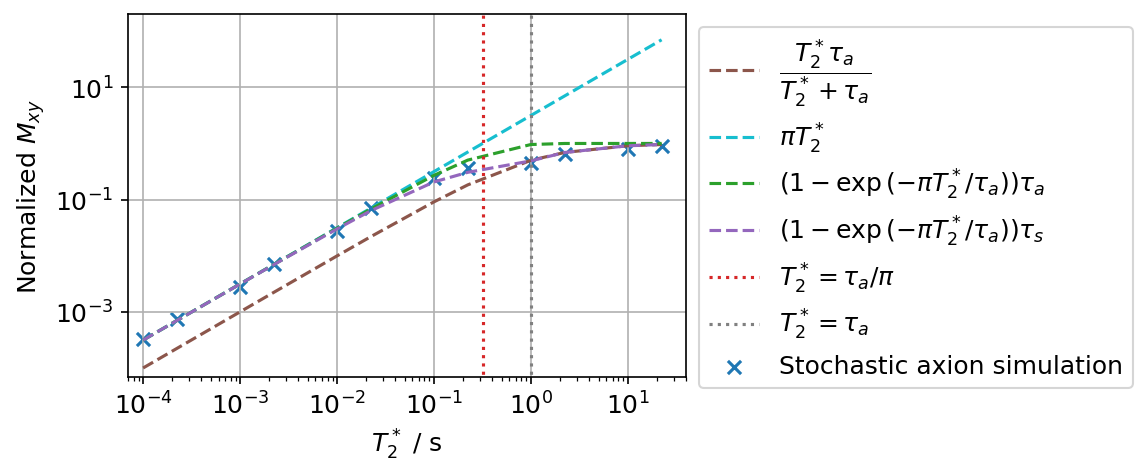

In [14]:
# reserved from 2022-08-25
T2star_list = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10.0, 2.236000e-04, 2.236000e-03, 2.236000e-02, 2.236000e-01, 2.236000e-0, 2.236000e1])
Mt_list = np.array([1.0754712613306289e-10, 9.298342429244889e-10, 9.211035691481888e-09, 7.992277977257878e-08, 1.4806393684754575e-07, 2.6830423522918387e-07, 2.5174690050477604e-10, 2.3536459622963905e-09, 2.3794741727640708e-08, 1.2152837848097963e-07, 2.193802726787371e-07, 3.0417381150087166e-07])
print(T2star_list)
print(Mt_list)

T2star_arr = np.sort(T2star_list)
Mt_arr = Mt_list[np.argsort(T2star_list)]
# T2start_list = T2start_list * 1 / (T2start_list + 1)
Mt_arr /= (abs(Xe129.gyroratio) * 0.45 * 1e-14 )
print(T2star_arr)
print(Mt_arr)
# [0.0001, 0.001, 0.01, 0.1, 1, 10.0]
# [1.0754712613306289e-10, 9.298342429244889e-10, 9.211035691481888e-09, 7.992277977257878e-08, 1.4806393684754575e-07, 2.6830423522918387e-07]
# [2.236*0.0001, 2.236*0.001, 2.236*0.01, 2.236*0.1, 2.236*1, 2.236*10.0]
# [2.236000e-04, 2.236000e-03, 2.236000e-02, 2.236000e-01, 2.236000e-0, 2.236000e1]
# [2.5174690050477604e-10, 2.3536459622963905e-09, 2.3794741727640708e-08, 1.2152837848097963e-07, 2.193802726787371e-07, 3.0417381150087166e-07]
taua = 1.0
plt.rc('font', size=12)
fig = plt.figure(figsize=(6*0.8, 4*0.8), dpi=150)  #
gs = gridspec.GridSpec(nrows=1, ncols=1)  #
# fig.subplots_adjust(left=left_spc, top=top_spc, right=right_spc,
#                     bottom=bottom_spc, wspace=xgrid_spc, hspace=ygrid_spc)
ax = fig.add_subplot(gs[0,0])

ax.plot(T2star_arr, T2star_arr * 1 / (T2star_arr + 1), label='$\dfrac{T_2^*\\tau_a}{T_2^* + \\tau_a}$', color='tab:brown', alpha=1, linestyle='--')
ax.plot(T2star_arr, np.pi * T2star_arr , label='$\\pi T_2^*$', color='tab:cyan', alpha=1, linestyle='--')
ax.plot(T2star_arr, (1 - np.exp(- np.pi*T2star_arr / taua))*taua, label='$(1-\\exp{(-\\pi T_2^*/\\tau_a)})\\tau_a$', color='tab:green', alpha=1, linestyle='--')

ax.plot(T2star_arr, (1 - np.exp(- np.pi*T2star_arr / taua)) /((1 - np.exp(- np.pi*T2star_arr**2 / taua**2))/T2star_arr + 1/taua), \
    label='$(1-\\exp{(-\\pi T_2^*/\\tau_a)})\\tau_s$', color='tab:purple', alpha=1, linestyle='--')
# ax.plot(T2star_arr, Mt_arr, label='Stochastic axion simulation', color='tab:blue', alpha=1)
ax.vlines(x=taua / np.pi, ymin = 1e-5, ymax = 1e3, colors='tab:red', linestyles='dotted', label='$T_2^* = \\tau_a/\\pi$')
ax.vlines(x=taua, ymin = 1e-5, ymax = 1e3, colors='grey', linestyles='dotted', label='$T_2^* = \\tau_a$')
# ax.vlines(x=10**(0.5), ymin = 1e-5, ymax = 1e3, colors='blue', linestyles='dotted', label='$np.log10(10**0.5)$')
ax.scatter(T2star_arr, Mt_arr, label='Stochastic axion simulation', marker='x', s=40, color='tab:blue', alpha=1)

# ax.step(, , where='post', label='', alpha=1)
ax.set_ylabel('Normalized $M_{xy}$')  # |Mxy|/($\mathrm{M}_0\gamma\mathrm{B}_a/2$)
ax.set_xlabel('$T_2^*$ / s')
# ax.set_title('PSD Signal Amplitude')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.7e-4, 4e1)
ax.set_ylim(0.7e-4, 2e2)

ax.grid()
ax.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
fig.suptitle('')
# plt.tight_layout()
plt.show()

TrajectoryMonitoring_gaNN=1e-07_axion_nu=1.0e+06_Xe_T2=0.01s_T1=1.0e+05s


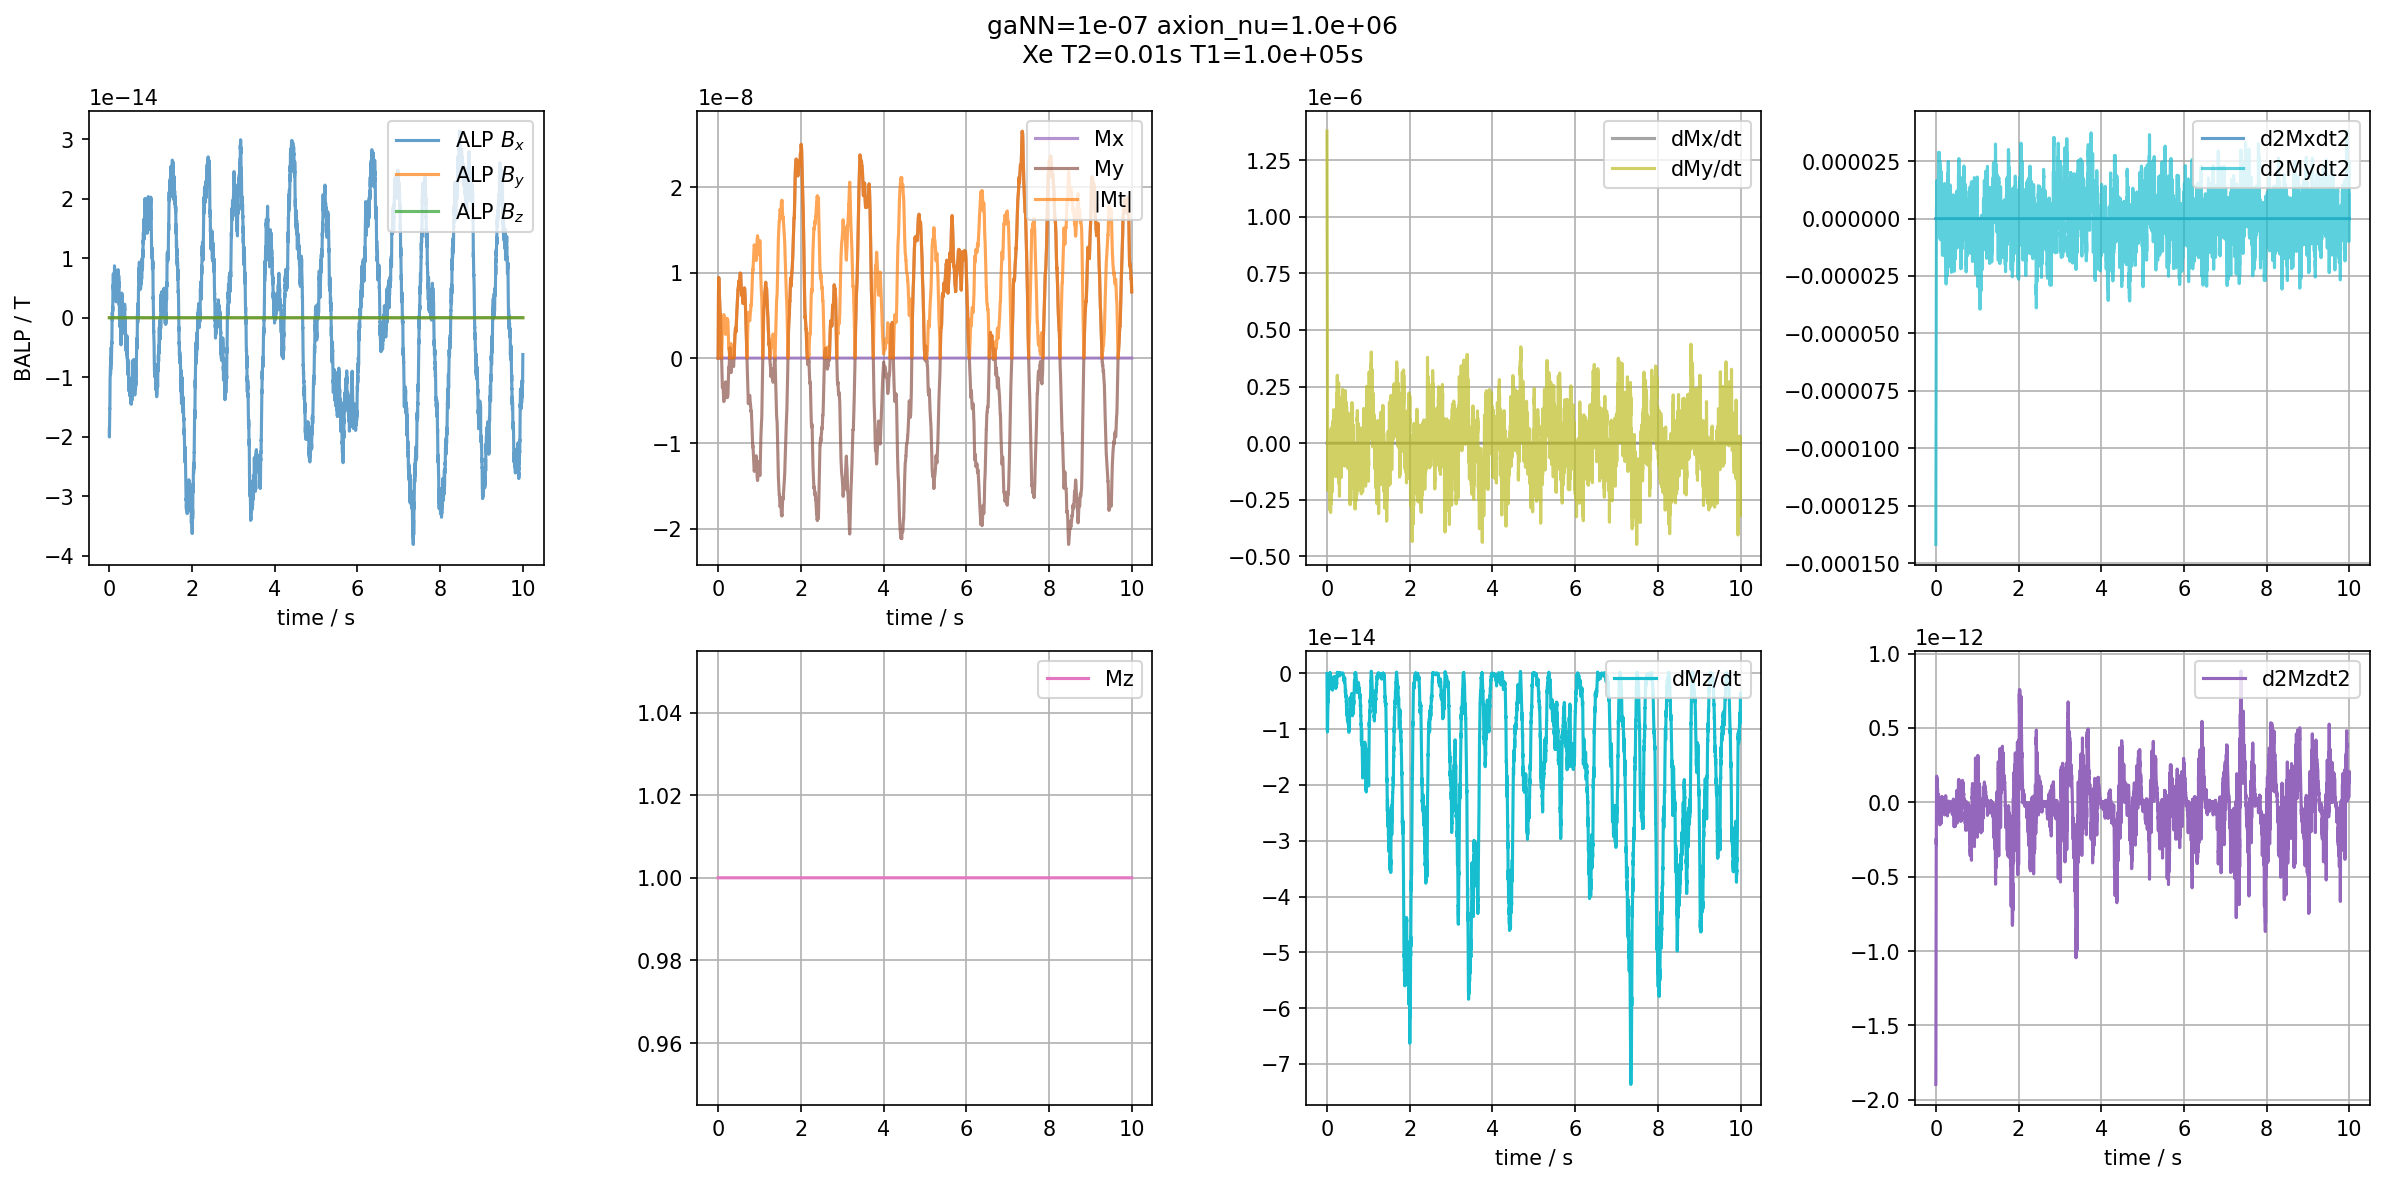

In [8]:
magnetization.MonitorTrajectory(plotrate=10**3,verbose=True)

C:\Users\zhenf\AppData\Local\Temp/ipykernel_8872/385513871.py @4 T2andavgMtsq_arr : ndarray([]) [shape=(0,)]
C:\Users\zhenf\AppData\Local\Temp/ipykernel_8872/385513871.py @5 GammaandSAmp_arr : ndarray([]) [shape=(0,)]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

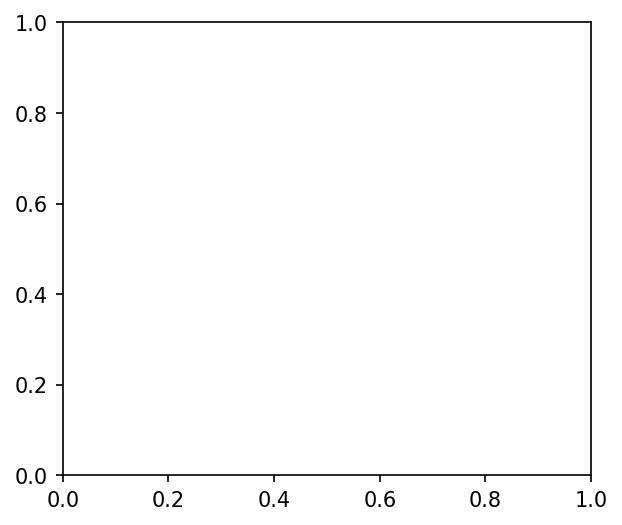

In [7]:


T2andavgMtsq_arr = np.array(listofT2andavgMtsq)
GammaandSAmp_arr = np.array(listofGammaandSAmp)
# spectrum_arr = np.array(listofspectrum)
check(T2andavgMtsq_arr)
check(GammaandSAmp_arr)
# filepath = 'D:/Mainz/CASPEr/20220522_NMRKineticSimu_data/20220527_test1/'
filepath = 'K:/CASPEr data/20220531_NMRKineticSimu_data_test7/'
np.savetxt(filepath + f'T2andavgMtsq_gaNN_-7_resol_match.txt', T2andavgMtsq_arr)
# np.savetxt(f'D:/Mainz/CASPEr/20220522_NMRKineticSimu_data/20220524_test1/GammaandSAmp_resol_1Hz.txt', GammaandSAmp_arr)
# np.savetxt(f'D:/Mainz/CASPEr/20220522_NMRKineticSimu_data/20220524_test1/spectrum_arr_resol_1Hz.txt', spectrum_arr)


fig = plt.figure(figsize=(10, 4), dpi=150)  #
gs = gridspec.GridSpec(nrows=1, ncols=2)  #
# fig.subplots_adjust(left=left_spc, top=top_spc, right=right_spc,
#                     bottom=bottom_spc, wspace=xgrid_spc, hspace=ygrid_spc)
ax = fig.add_subplot(gs[0,0])
# ax.plot(GammaandSAmp_arr[:, 0], GammaandSAmp_arr[:, 1], label='PSD Signal Amp', color='tab:cyan', alpha=1)
ax.plot(np.abs(T2andavgMtsq_arr[:, 0]), T2andavgMtsq_arr[:, 1], label='avgMtsq', color='tab:blue', alpha=1)
ax.scatter(np.abs(T2andavgMtsq_arr[:, 0]), T2andavgMtsq_arr[:, 1], marker='x', s=40, color='tab:blue', alpha=1)

# ax.plot(GammaandSAmp_arr[:, 0], GammaandSAmp_arr[:, 1], label='SNR', alpha=1)
# ax.step(, , where='post', label='', alpha=1)
ax.set_ylabel('avgMtsq')  #  / $\Phi_0^{2} / Hz$
ax.set_xlabel('T2* / s')
# ax.set_title('PSD Signal Amplitude')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-13, 1e0)
ax.grid()


ax01 = fig.add_subplot(gs[0,1])
ax01.plot(T2andavgMtsq_arr[:, 0], T2andavgMtsq_arr[:, 2], \
    color='tab:orange', label='Power / V^2', alpha=1)
ax01.scatter(T2andavgMtsq_arr[:, 0], T2andavgMtsq_arr[:, 2], \
    color='tab:orange', marker='x', s=30,  alpha=1)
# ax01.plot(GammaandSAmp_arr[:, 0], (GammaandSAmp_arr[:, 0]) * GammaandSAmp_arr[:, 1], \
#     color='tab:orange', label='Signal-to-noise ratio', alpha=1)
# ax01.scatter(GammaandSAmp_arr[:, 0],  (GammaandSAmp_arr[:, 0]) * GammaandSAmp_arr[:, 1], \
#     color='tab:orange', marker='x', s=30,  alpha=1)
ax01.set_ylabel('Power / V^2')
ax01.set_xlabel('T2* / s')
ax01.set_xscale('log')
ax01.set_yscale('log')
# ax01.set_ylim(1e-13, 1e0)
ax01.grid()
# ax01.set_title('Signal-to-noise ratio')
# fig.suptitle('chunksize = 1.0/samplelinewidth')
fig.suptitle('resolution = 1 Hz')

plt.tight_layout()
plt.show()


fig = plt.figure(figsize=(10, 4), dpi=150)  #
gs = gridspec.GridSpec(nrows=1, ncols=2)  #
# fig.subplots_adjust(left=left_spc, top=top_spc, right=right_spc,
#                     bottom=bottom_spc, wspace=xgrid_spc, hspace=ygrid_spc)
ax = fig.add_subplot(gs[0,0])
# ax.plot(GammaandSAmp_arr[:, 0], GammaandSAmp_arr[:, 1], label='PSD Signal Amp', color='tab:cyan', alpha=1)
ax.plot(np.abs(GammaandSAmp_arr[:, 0]), GammaandSAmp_arr[:, 1], label='PSD Signal Amp', color='tab:blue', alpha=1)
ax.scatter(np.abs(GammaandSAmp_arr[:, 0]), GammaandSAmp_arr[:, 1], marker='x', s=40, color='tab:blue', alpha=1)

# ax.plot(GammaandSAmp_arr[:, 0], GammaandSAmp_arr[:, 1], label='SNR', alpha=1)
# ax.step(, , where='post', label='', alpha=1)
ax.set_ylabel('PSD Signal Amplitude')  #  / $\Phi_0^{2} / Hz$
ax.set_xlabel('Sample linewidth / Hz')
# ax.set_title('PSD Signal Amplitude')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-13, 1e0)
ax.grid()


ax01 = fig.add_subplot(gs[0,1])
ax01.plot(GammaandSAmp_arr[:, 0], np.sqrt(GammaandSAmp_arr[:, 0]) * GammaandSAmp_arr[:, 1], \
    color='tab:orange', label='Signal-to-noise ratio', alpha=1)
ax01.scatter(GammaandSAmp_arr[:, 0], np.sqrt(GammaandSAmp_arr[:, 0]) * GammaandSAmp_arr[:, 1], \
    color='tab:orange', marker='x', s=30,  alpha=1)
# ax01.plot(GammaandSAmp_arr[:, 0], (GammaandSAmp_arr[:, 0]) * GammaandSAmp_arr[:, 1], \
#     color='tab:orange', label='Signal-to-noise ratio', alpha=1)
# ax01.scatter(GammaandSAmp_arr[:, 0],  (GammaandSAmp_arr[:, 0]) * GammaandSAmp_arr[:, 1], \
#     color='tab:orange', marker='x', s=30,  alpha=1)
ax01.set_ylabel('Adopted SNR in PSD')
ax01.set_xlabel('Sample linewidth / Hz')
ax01.set_xscale('log')
ax01.set_yscale('log')
# ax01.set_ylim(1e-13, 1e0)
ax01.grid()
# ax01.set_title('Signal-to-noise ratio')
# fig.suptitle('chunksize = 1.0/samplelinewidth')
fig.suptitle('resolution = 1 Hz')

plt.tight_layout()
plt.show()